# 1. Introducción

En este Notebook se centra en la **carga, limpieza y exploración** de los datos que se utilizarán posteriormente para el análisis de maniobras de conducción. 

Para realizar dichas tareas, se cuenta con datos de 5 conductores diferentes, disponiendo de cada uno 5 ficheros Excel correspondientes a las siguientes maniobras:

- **STISIMData_3step-Turnings** (Giro en tres pasos)

- **STISIMData_Overtaking** (Adelantamiento)

- **STISIMData_Stopping** (Detención)

- **STISIMData_Turnings** (Giro convencional)

- **STISIMData_U-Turnings** (Giro en U)

El principal objetivo de este notebook es preparar y entender el dataset mediante el cumplimiento de las siguientes metas:

- **Carga de datos:** Leer los ficheros Excel y estructurarlos de forma coherente.

- **Selección de columnas relevantes:** Centrarse en las señales básicas, tales como *Speed, RPM, Steering Wheel Angle, Gas Pedal, Brake Pedal, Clutch Pedal, Gear* y el atributo *Maneuver marker flag*, indicador de la realización de la maniobra.

- **Limpieza de datos:** Identificar y gestionar valores nulos o inconsistencias, y descartar columnas innecesarias.

- **Análisis exploratorio:** Realizar visualizaciones y estadísticas descriptivas que permitan entender la distribución y características de los datos.

Este preprocesamiento es fundamental para preparar la información que se utilizará en el siguiente Notebook, donde se implementará la segmentación temporal y el modelado para la detección de maniobras.

In [1]:
# Asegurar haber instalado las librerías necesarias con requirements.txt (README.md - Apartado 7)

# Importación de las librerías básicas
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración básica para los gráficos en línea
%matplotlib inline

# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# 2. Carga de Datos

En esta sección se realiza la lectura de los ficheros Excel con los datos de las maniobras de conducción.

La estructura de los directorios es la siguiente:

- La carpeta [`data/`](./data/) contiene 5 directorios, cada uno llamado `DriverX`, donde $X ∈ \{1, 2, 3, 4, 5\}$.

- Dentro de cada directorio de `DriverX`, se encuentran 5 ficheros Excel, uno por cada maniobra:

  - `STISIMData_3step-Turnings.xlsx`

  - `STISIMData_Overtaking.xlsx`

  - `STISIMData_Stopping.xlsx`

  - `STISIMData_Turnings.xlsx`

  - `STISIMData_U-Turnings.xlsx`

En este Notebook, se leen estos ficheros y se almacenan en DataFrames separados, organizados en un diccionario donde cada clave es una tupla (Driver, Maneuver). De esta forma, se puede trabajar de forma individual con los datos de cada conductor y maniobra, permitiendo filtrar y analizar de forma específica cada conjunto.

In [2]:
# Directorio base donde se encuentran las carpetas de cada conductor
data_path = "./data"  # Ajusta esta ruta según tu ubicación real

# Lista de nombres de ficheros que esperas encontrar en cada carpeta de Driver
filenames = [
    "STISIMData_3step-Turnings.xlsx",
    "STISIMData_Overtaking.xlsx",
    "STISIMData_Stopping.xlsx",
    "STISIMData_Turnings.xlsx",
    "STISIMData_U-Turnings.xlsx",
]

# Diccionario para almacenar los DataFrames de cada combinación (Driver, Maneuver)
df_dict = {}

# Recorremos cada carpeta en 'data' (Driver1, Driver2, etc.)
for driver_folder in os.listdir(data_path):
    driver_path = os.path.join(data_path, driver_folder)

    # Verificamos que sea una carpeta (para descartar archivos sueltos)
    if os.path.isdir(driver_path):
        # Recorremos la lista de ficheros esperados
        for file in filenames:
            file_path = os.path.join(driver_path, file)

            # Comprobamos que el fichero exista antes de intentar leerlo
            if os.path.exists(file_path):
                # Leemos el archivo Excel
                try:
                    df = pd.read_excel(file_path)

                    # Extraemos el nombre de la maniobra a partir del nombre del fichero, sin la extensión
                    maneuver_name = os.path.splitext(file)[0]

                    # Guardamos el DataFrame en un diccionario con la clave (Driver, Maneuver)
                    df_dict[(driver_folder, maneuver_name)] = df

                except Exception as e:
                    print(f"Error al leer {file_path}: {e}")
            else:
                print(f"Archivo no encontrado: {file_path}")

# Verificamos cuántos DataFrames se han cargado
print(f"Se han cargado {len(df_dict)} DataFrames en total.")

# Ejemplo de cómo acceder a los DataFrames individuales
for key in df_dict.keys():
    print(f"Conductor: {key[0]}, Maniobra: {key[1]}, Tamaño: {df_dict[key].shape}")

# Ejemplo de cómo acceder a un DataFrame específico
df_dict[("Driver1", "STISIMData_3step-Turnings")].head()

Se han cargado 25 DataFrames en total.
Conductor: Driver1, Maniobra: STISIMData_3step-Turnings, Tamaño: (8933, 23)
Conductor: Driver1, Maniobra: STISIMData_Overtaking, Tamaño: (5952, 23)
Conductor: Driver1, Maniobra: STISIMData_Stopping, Tamaño: (11589, 23)
Conductor: Driver1, Maniobra: STISIMData_Turnings, Tamaño: (5308, 23)
Conductor: Driver1, Maniobra: STISIMData_U-Turnings, Tamaño: (5801, 23)
Conductor: Driver2, Maniobra: STISIMData_3step-Turnings, Tamaño: (9191, 23)
Conductor: Driver2, Maniobra: STISIMData_Overtaking, Tamaño: (6263, 23)
Conductor: Driver2, Maniobra: STISIMData_Stopping, Tamaño: (11515, 23)
Conductor: Driver2, Maniobra: STISIMData_Turnings, Tamaño: (6315, 23)
Conductor: Driver2, Maniobra: STISIMData_U-Turnings, Tamaño: (5206, 23)
Conductor: Driver5, Maniobra: STISIMData_3step-Turnings, Tamaño: (8662, 23)
Conductor: Driver5, Maniobra: STISIMData_Overtaking, Tamaño: (6183, 23)
Conductor: Driver5, Maniobra: STISIMData_Stopping, Tamaño: (11551, 23)
Conductor: Driver5, 

,Elapsed time,Long Dist,Lat Pos,Steering wheel angle,Throttle input,Brake pedal force,Gas pedal,Brake pedal,Clutch pedal,Left turn,...,RPM,Hand wheel torque,Maneuver marker flag,Accidents,Collisions,Peds Hit,Speeding Tics,Red Lgt Tics,Speed Exceed,Stop Sign Ticks
0,0.100,0.00,2.17,-8.24,0.0,1.36,0,0,0,0,...,147.244,-0.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.152,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,184.118,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.204,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,219.193,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.254,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,252.554,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.304,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,284.287,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El código recorre la carpeta `data/`, y para cada directorio (cada conductor) lee los 5 ficheros Excel correspondientes a las maniobras. Para cada archivo, se añade información adicional (`Driver` y `Maneuver`) y se almacena el DataFrame resultante en un diccionario, utilizando la tupla `(Driver, Maneuver)` como clave. Finalmente, se imprime el número total de DataFrames cargados y se muestran las dimensiones de cada uno para verificar la carga correcta de los datos.

# 3. Selección de Atributos Relevantes

El enunciado indica que, para la práctica, se deben utilizar únicamente aquellas señales que sean esenciales para detectar las maniobras de conducción. En concreto, se opta por conservar los siguientes atributos:

- **Speed (Velocidad):** Variable fundamental que indica cómo varía la velocidad del vehículo en cada instante. Esto es crucial para la detección de aceleraciones o desaceleraciones durante una maniobra.

- **RPM (Revoluciones por minuto):** Proporciona información sobre el régimen del motor, lo cual puede estar relacionado con los cambios de marcha y la aceleración.

- **Steering Wheel Angle (Ángulo del volante):** Indica la dirección en la que se mueve el volante y, por tanto, es clave para identificar maniobras de giro.

- **Gas Pedal (Pedal del acelerador):** Permite saber cuándo y cuánto se está acelerando, lo que es importante para distinguir acciones como adelantamientos o aceleraciones durante maniobras.

- **Brake Pedal (Pedal del freno):** Mide la acción del freno ejercida por el vehículo, lo que ayuda a identificar paradas o desaceleraciones bruscas. Se diferencia del "Brake Pedal Force", que se usa en otros contextos, pero en nuestros datos, las simulaciones se han realizado en entornos sin pendientes, por lo que el valor de Brake Pedal es suficiente.

- **Clutch Pedal (Pedal del embrague):** Este atributo es útil para detectar el momento en que se realizan cambios de marcha, ya que su activación suele preceder a la modificación en la marcha.

- **Gear (Marcha):** Indica la marcha en la que se encuentra el vehículo. Se debe prestar especial atención a que, en ocasiones, durante los cambios de marcha se registra un valor 0 (indicando punto muerto), pero esto se interpreta como una transición entre marchas (por ejemplo, de 3ª a 2ª).

- **Maneuver marker flag:** Este atributo es esencial, ya que marca con un 1 cuando se está realizando la maniobra correspondiente y con un 0 cuando no lo está, permitiendo segmentar el tiempo en el que la acción tiene lugar.

Por otro lado, se omiten otros atributos presentes en los ficheros (por ejemplo: *Long Dist, Lat Pos, Throttle input*, etc.), ya que no aportan información relevante para el reconocimiento de maniobras. Además, se descartan los atributos **Left turn** y **Right turn**, ya que según el enunciado no deben utilizarse para la detección de maniobras de giro, debido a la falta de valores dentro de algunos de los ficheros de datos.

Esta selección permite centrar el análisis únicamente en las variables que aportan información directa sobre la dinámica del vehículo y el comportamiento del conductor, facilitando así el preprocesamiento y la posterior identificación de patrones en las maniobras.

In [3]:
# Lista de columnas relevantes según el enunciado
relevant_columns = [
    "speed",
    "RPM",
    "Steering wheel angle",
    "Gas pedal",
    "Brake pedal",
    "Clutch pedal",
    "Gear",
    "Maneuver marker flag",
]

# Crear un nuevo diccionario que contiene los DataFrames filtrados por cada (Driver, Maneuver)
df_dict_filtered = {key: df[relevant_columns].copy() for key, df in df_dict.items()}

# Ejemplo de acceso a un DataFrame filtrado:
# Para ver los datos del conductor "Driver1" en la maniobra "STISIMData_3step-Turnings"
driver = "Driver1"
maneuver = "STISIMData_3step-Turnings"
key = (driver, maneuver)
if key in df_dict_filtered:
    print(f"Primeras filas para {driver} - {maneuver}:")
    display(df_dict_filtered[key].head())
else:
    print(f"No se encontró el DataFrame para {driver} - {maneuver}")

Primeras filas para Driver1 - STISIMData_3step-Turnings:


,speed,RPM,Steering wheel angle,Gas pedal,Brake pedal,Clutch pedal,Gear,Maneuver marker flag
0,0.06,147.244,-8.24,0,0,0,0,0
1,0.04,184.118,-8.24,0,0,0,0,0
2,0.02,219.193,-8.24,0,0,0,0,0
3,0.00,252.554,-8.24,0,0,0,0,0
4,0.00,284.287,-8.24,0,0,0,0,0


- Se define una lista `relevant_columns` con las columnas esenciales para el análisis, según el enunciado.

- Se utiliza una comprensión de diccionario para crear `df_dict_filtered`, en la que cada DataFrame de `df_dict` se filtra para conservar solo las columnas relevantes (usando `.copy()` para evitar problemas de referencia).

- Se incluye un ejemplo de cómo acceder y visualizar los datos de un conductor y maniobra específicos, utilizando la clave `(Driver, Maneuver)`.

Con esta adaptación, cada DataFrame se mantiene de forma independiente, permitiendo trabajar y analizar los datos de cada conductor y maniobra por separado.

# 4. Limpieza de Datos

En esta sección preparamos cada DataFrame (correspondiente a cada combinación de conductor y maniobra) para el análisis posterior. Recordemos que los datos provienen de un simulador de conducción que registra información a $20 \, \text{Hz}$, por lo que capturan de forma muy detallada la dinámica de cada maniobra.

Se realizan las siguientes tareas de limpieza en cada DataFrame:

- **Gestión de valores nulos:** Se revisan las columnas relevantes (*speed, RPM, Steering wheel angle, Gas pedal, Brake pedal, Clutch pedal, Gear y Maneuver marker flag*). En caso de encontrar valores faltantes, se rellenan utilizando la mediana para preservar la distribución de los datos.

- **Conversión de tipos de datos:** Se asegura que las columnas numéricas estén en formato *float* para permitir cálculos precisos.

- **Outliers:** Dado que se analizarán las señales en los rangos exactos en que se ejecutan las maniobras (utilizando ventanas temporales), eliminar outliers podría borrar información valiosa, especialmente en transiciones como los cambios de marcha (donde es normal que "Gear" tenga valores 0 intermedios). Por ello, se opta por no eliminar outliers de forma sistemática.

- **Maneuver marker flag:** Se verifica que esta columna contenga únicamente 0 y 1, y se asegura de que esté en formato entero, ya que es crucial para segmentar correctamente las maniobras.

El siguiente código aplica estos pasos de limpieza a cada DataFrame almacenado en el diccionario.

In [4]:
# Iteramos sobre cada DataFrame en el diccionario filtrado
for key, df in df_dict_filtered.items():
    print(f"Limpieza para {key}:")

    # 1. Revisar los valores nulos
    print("Valores nulos por columna:")
    print(df.isnull().sum())

    # 2. Verificar y convertir "Maneuver marker flag" a entero
    if "Maneuver marker flag" in df.columns:
        print(
            "\nValores únicos en 'Maneuver marker flag':",
            df["Maneuver marker flag"].unique(),
        )
        df["Maneuver marker flag"] = df["Maneuver marker flag"].astype(int)

    # 3. Definir las columnas numéricas relevantes
    numeric_columns = [
        "speed",
        "RPM",
        "Steering wheel angle",
        "Gas pedal",
        "Brake pedal",
        "Clutch pedal",
        "Gear",
    ]

    # 4. Rellenar valores nulos en las columnas numéricas con la mediana
    for col in numeric_columns:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(
                f"Se han rellenado los valores nulos de '{col}' con la mediana: {median_val}"
            )

    # 5. Convertir las columnas numéricas al tipo float
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # 6. Visualizar estadísticas descriptivas para confirmar la limpieza
    print("\nEstadísticas descriptivas:")
    print(df[numeric_columns].describe())
    print("\n-----------------------------\n")

Limpieza para ('Driver1', 'STISIMData_3step-Turnings'):
Valores nulos por columna:
speed                   0
RPM                     0
Steering wheel angle    0
Gas pedal               0
Brake pedal             0
Clutch pedal            0
Gear                    0
Maneuver marker flag    0
dtype: int64

Valores únicos en 'Maneuver marker flag': [0 1]

Estadísticas descriptivas:
             speed          RPM  Steering wheel angle     Gas pedal  \
count  8933.000000  8933.000000           8933.000000   8933.000000   
mean     27.076534  1690.436524             -4.288223  19731.515392   
std      27.264831   960.969137            229.965259  17383.355246   
min       0.000000   124.919000           -466.580000      0.000000   
25%       3.220000   921.292000            -56.640000      0.000000   
50%      14.510000  1282.623000             -2.060000  20160.000000   
75%      49.460000  2358.363000             14.420000  35405.000000   
max      84.590000  4774.648000            414.0600

- **Iteración sobre cada DataFrame:** 
    - Se recorre el diccionario `df_dict_filtered` para aplicar la limpieza de forma individual a cada DataFrame (cada combinación de conductor y maniobra).

- **Valores nulos:** 
    - Se imprime la cantidad de valores nulos por columna y, si se detectan, se rellenan con la mediana de cada variable.

- **Conversión de tipos:** 
    - Se asegura que las columnas numéricas estén en formato float, lo cual es esencial para cálculos posteriores.

- **Maneuver marker flag:** 
    - Se verifica que esta columna contenga solo 0 y 1, y se convierte a tipo entero.

- **Outliers:** 
    - Se deja intacta la información de los outliers, ya que, al analizar la dinámica de las maniobras en ventanas temporales, se desea conservar incluso los valores intermedios en “Gear” (por ejemplo, los 0 durante los cambios de marcha).

- **Estadísticas descriptivas:** 
    - Se muestran las estadísticas básicas de las variables numéricas para confirmar que los datos han sido limpiados correctamente.

# 5. Discretización

Dado que los datos se capturan cada 1/20 segundos en un entorno simulado, es crucial conservar la dinámica completa de la maniobra. Por ello, en lugar de escalar las señales a un rango fijo (por ejemplo, de 0 a 1), optamos por discretizarlas para reflejar la tendencia de cada variable a lo largo del tiempo.

El criterio establecido es el siguiente:
- **speed, RPM y Steering wheel angle:**  
  Se calcula la diferencia entre el valor actual y el anterior. Si la diferencia es positiva, se asigna +1 (la señal aumenta); si es negativa, -1 (disminuye); y si es cero, 0 (se mantiene).

  $$ \hat{v}_k =
  \begin{cases} 
      1, & \text{si } \Delta v_k > 0 \\ 
      0, & \text{si } \Delta v_k = 0 \\ 
      -1, & \text{si } \Delta v_k < 0 
  \end{cases} $$

- **Gas pedal y Brake pedal:**  
  Se aplica el mismo criterio de diferencia para determinar la tendencia. Además, si se observa el valor máximo (por ejemplo, 1, indicando que el pedal está completamente presionado), se conserva ese comportamiento.

  $$ \hat{g}_k =
  \begin{cases} 
      1, & \text{si } \Delta g_k > 0 \\ 
      0, & \text{si } \Delta g_k = 0 \\ 
      -1, & \text{si } \Delta g_k < 0 
  \end{cases} $$

- **Clutch pedal:**  
  Al ser una variable binaria (0 o 1), se mantiene su valor sin cambios.

  $$ \hat{p}_k =
  \begin{cases} 
      1, & \text{si } p_k > 0 \\ 
      0, & \text{si } p_k = 0 
  \end{cases} $$

- **Gear (Marcha):**  
  Durante un cambio de marcha es normal que aparezcan instantes con valor 0 (indicando punto muerto) entre dos valores distintos (por ejemplo, de 3 a 2). Para capturar la verdadera tendencia, se define una función que ignore estos 0 intermedios y compare el valor actual con el último valor distinto de 0, de modo que se considere correctamente si la marcha está aumentando o disminuyendo.

  $$ \hat{s}_k =
  \begin{cases} 
      1, & \text{si } \Delta s_k > 0 \\ 
      -1, & \text{si } \Delta s_k < 0 
  \end{cases} $$

Esta transformación en valores discretos (o "tendencias") nos permitirá analizar la evolución de las maniobras a través de ventanas temporales, preservando la información dinámica sin perder detalles importantes en transiciones como los cambios de marcha.

A continuación, se muestra el código que aplica esta discretización a cada DataFrame en el diccionario `df_dict_filtered`.

In [5]:
# Iteramos sobre cada DataFrame en el diccionario filtrado para aplicar la discretización
for key, df in df_dict_filtered.items():
    # Para 'speed', 'RPM' y 'Steering wheel angle' calculamos la diferencia entre muestras consecutivas.
    df["Speed_trend"] = (
        df["speed"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    )
    df["RPM_trend"] = (
        df["RPM"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    )
    df["Steering_trend"] = (
        df["Steering wheel angle"]
        .diff()
        .apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    )

    # Para 'Gas pedal' y 'Brake pedal', aplicamos el mismo criterio.
    df["Gas_trend"] = (
        df["Gas pedal"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    )
    df["Brake_trend"] = (
        df["Brake pedal"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    )

    # 'Clutch pedal' se conserva tal cual, ya que es binaria.
    df["Clutch_trend"] = df["Clutch pedal"]

    # Para 'Gear', definimos una función personalizada que tenga en cuenta que durante
    # un cambio de marcha pueden aparecer instantes con valor 0 (punto muerto) intermedios.
    def compute_gear_trend(gear_series):
        trend = []
        prev = None  # Almacena el último valor distinto de 0
        for val in gear_series:
            if prev is None:
                trend.append(0)
                if val != 0:
                    prev = val
            else:
                if val == 0:
                    # El 0 intermedio se considera parte de la transición sin modificar la tendencia.
                    trend.append(0)
                else:
                    # Comparamos con el último valor no cero.
                    if val > prev:
                        trend.append(1)
                    elif val < prev:
                        trend.append(-1)
                    else:
                        trend.append(0)
                    prev = val
        return trend

    df["Gear_trend"] = compute_gear_trend(df["Gear"])

    # Actualizamos el diccionario con el DataFrame discretizado
    df_dict_filtered[key] = df

# Ejemplo: Visualizamos las primeras 10 filas de un DataFrame para comprobar la discretización.
example_key = ("Driver1", "STISIMData_3step-Turnings")
if example_key in df_dict_filtered:
    display(
        df_dict_filtered[example_key][
            [
                "speed",
                "Speed_trend",
                "RPM",
                "RPM_trend",
                "Steering wheel angle",
                "Steering_trend",
                "Gas pedal",
                "Gas_trend",
                "Brake pedal",
                "Brake_trend",
                "Gear",
                "Gear_trend",
            ]
        ].head(10)
    )
else:
    print(f"No se encontró el DataFrame para {example_key}")

,speed,Speed_trend,RPM,RPM_trend,Steering wheel angle,Steering_trend,Gas pedal,Gas_trend,Brake pedal,Brake_trend,Gear,Gear_trend
0,0.06,0,147.244,0,-8.24,0,0,0,0,0,0,0
1,0.04,-1,184.118,1,-8.24,0,0,0,0,0,0,0
2,0.02,-1,219.193,1,-8.24,0,0,0,0,0,0,0
3,0.00,-1,252.554,1,-8.24,0,0,0,0,0,0,0
4,0.00,0,284.287,1,-8.24,0,0,0,0,0,0,0
5,0.00,0,314.470,1,-8.24,0,0,0,0,0,0,0
6,0.00,0,343.179,1,-8.24,0,0,0,0,0,0,0
7,0.00,0,370.486,1,-7.20,1,0,0,0,0,0,0
8,0.00,0,396.460,1,-8.24,-1,0,0,0,0,0,0
9,0.00,0,425.960,1,-8.24,0,0,0,0,0,0,0


1. **Cálculo de tendencias para speed, RPM y Steering wheel angle:**
    - Se utiliza `.diff()` para obtener la diferencia entre cada muestra y la anterior.
    - Mediante una función lambda se asigna +1, 0 o -1 según si la señal aumenta, se mantiene o disminuye.

2. **Tendencia para Gas pedal y Brake pedal:**
    - Se aplica el mismo criterio que en el caso anterior.

3. **Clutch pedal:**
    - Se conserva su valor original, ya que es una variable binaria.

4. **Cálculo de la tendencia para Gear:**
    - Se define la función `compute_gear_trend` que recorre la serie, ignorando los valores 0 intermedios (punto muerto) y comparando el valor actual con el último valor distinto de 0 para determinar correctamente si la marcha está aumentando o disminuyendo.

5. **Aplicación a cada DataFrame:**
    - Se itera sobre cada DataFrame en el diccionario `df_dict_filtered` y se añaden las nuevas columnas de tendencia.
    - Finalmente, se muestra un ejemplo para verificar que la discretización se realizó correctamente.

# 6. Análisis Exploratorio Inicial

En esta sección se realiza un análisis exploratorio básico de los datos para obtener una primera impresión de la distribución y las relaciones entre las variables relevantes en cada DataFrame. Dado que ahora tenemos datos organizados por cada combinación (Driver, Maneuver) en `df_dict_filtered`, se puede analizar individualmente cada conjunto o elegir uno de ejemplo.

Se incluirán:

- Visualizaciones básicas, como histogramas de las señales principales (*speed, RPM, Steering wheel angle, Gas pedal, Brake pedal, Clutch pedal y Gear*).

- Una matriz de correlación (heatmap) para identificar posibles relaciones lineales entre las variables.

Este análisis nos ayudará a entender la distribución de los datos y a identificar patrones que puedan ser relevantes para la detección de maniobras.

Mostrando gráficas para Driver1 - Maniobra: STISIMData_3step-Turnings


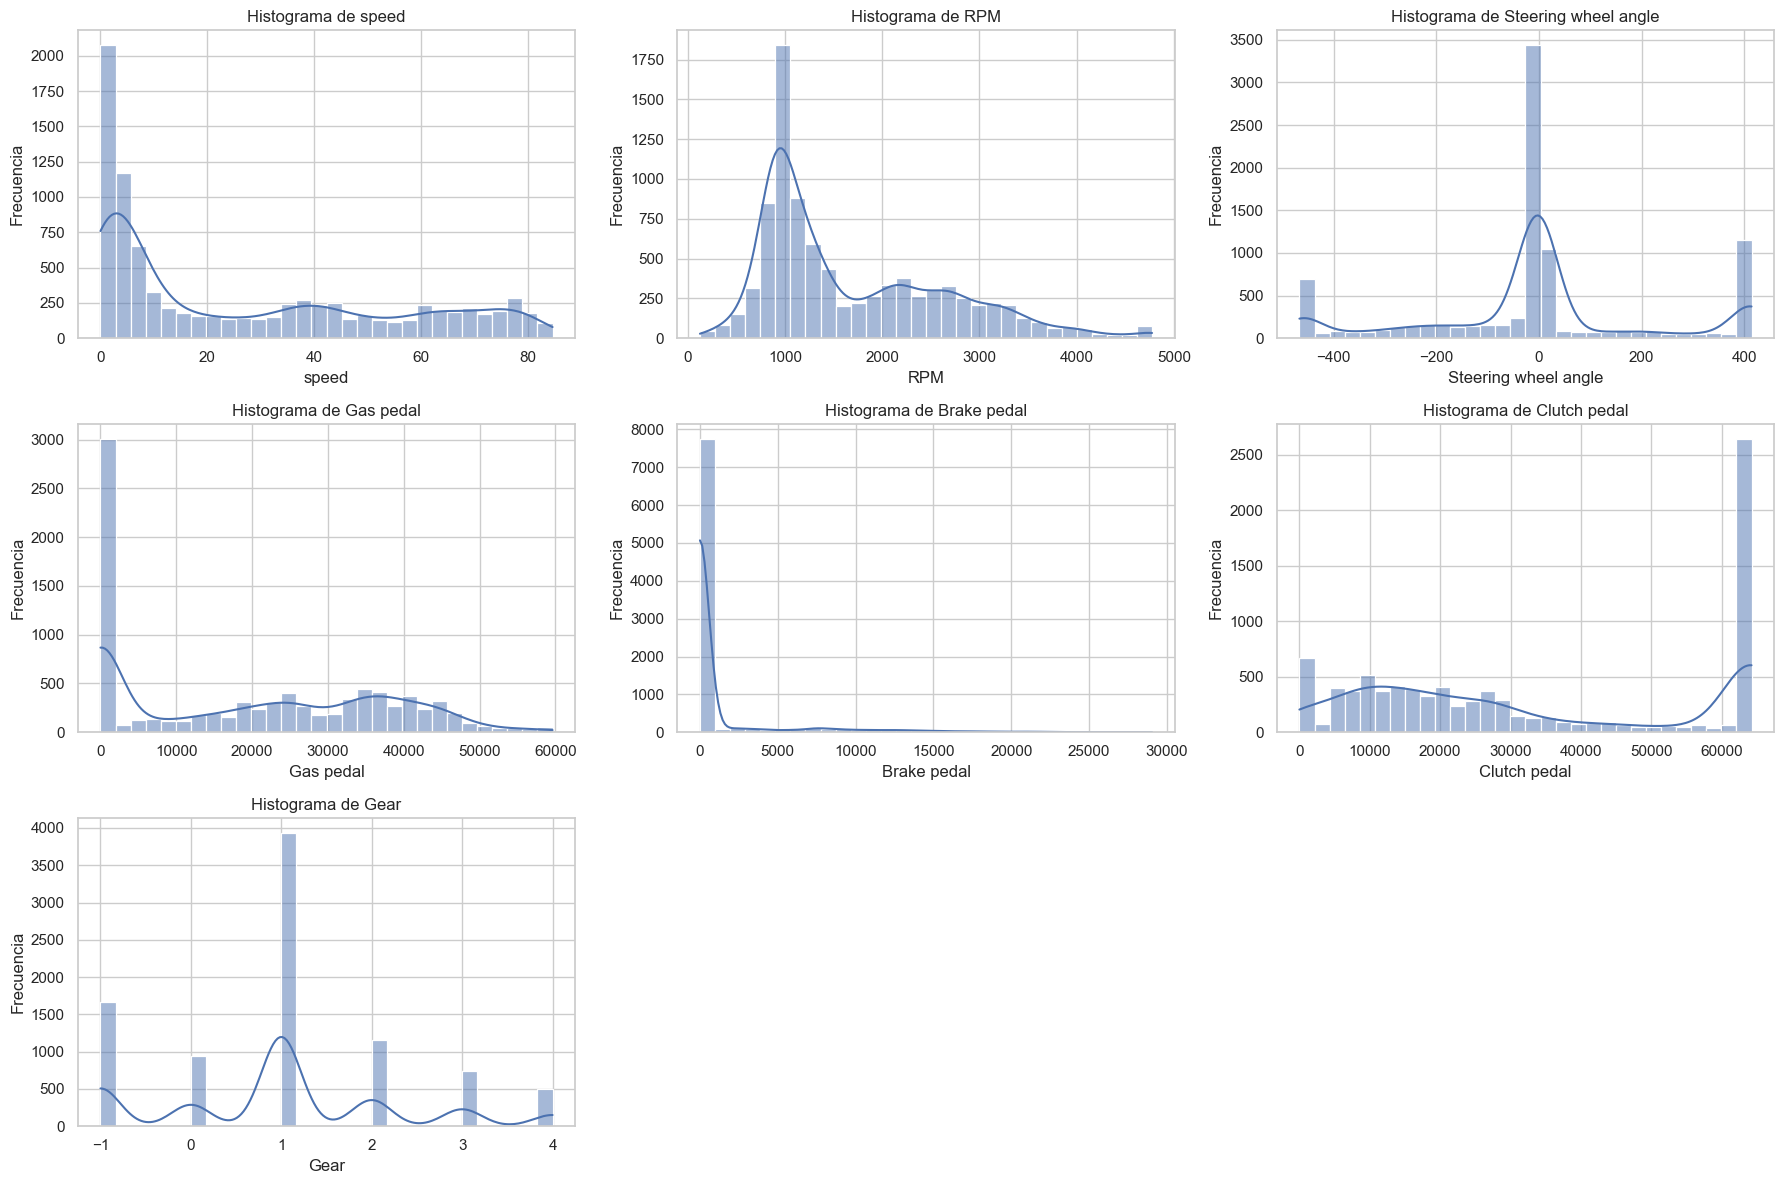

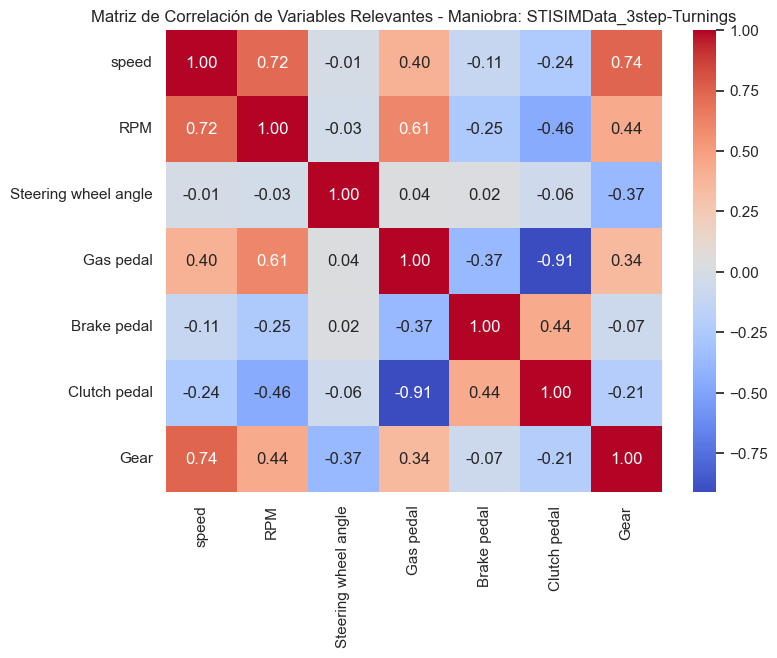

Mostrando gráficas para Driver1 - Maniobra: STISIMData_Overtaking


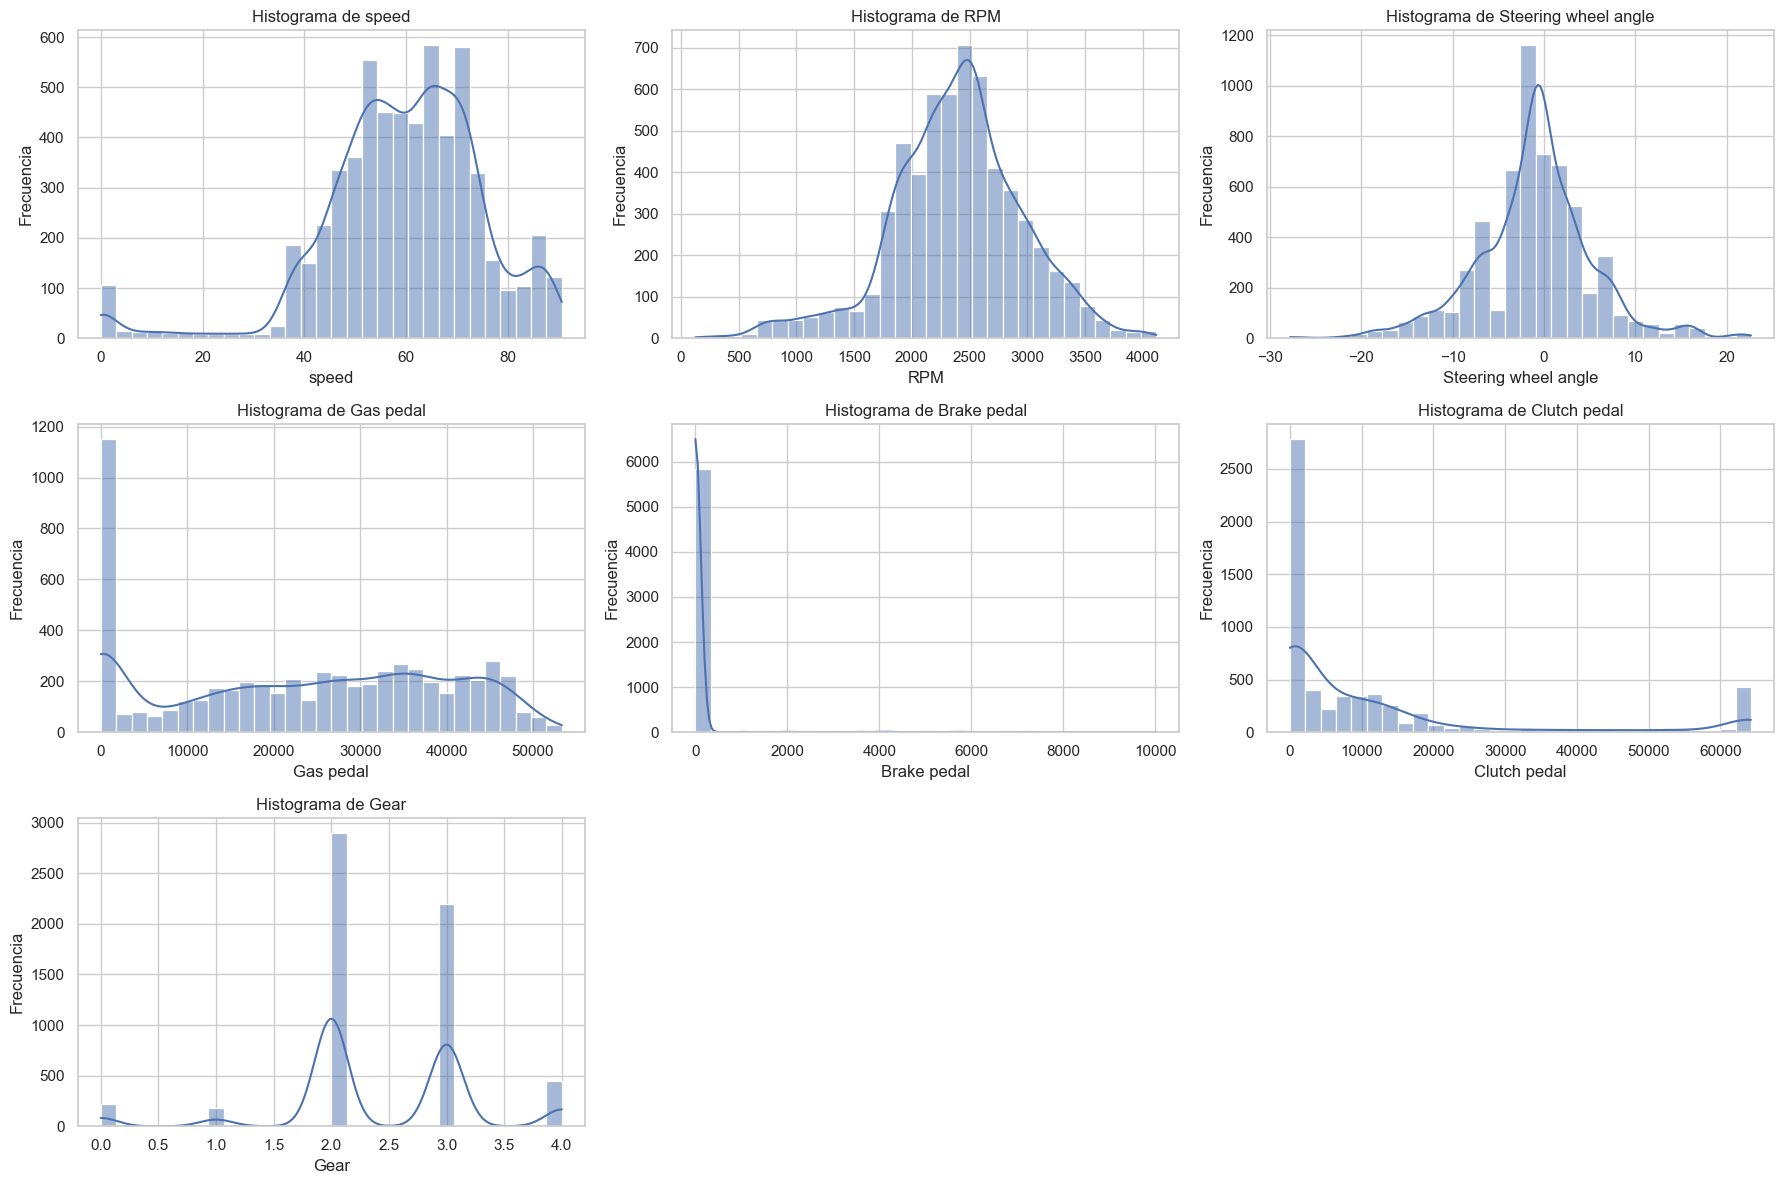

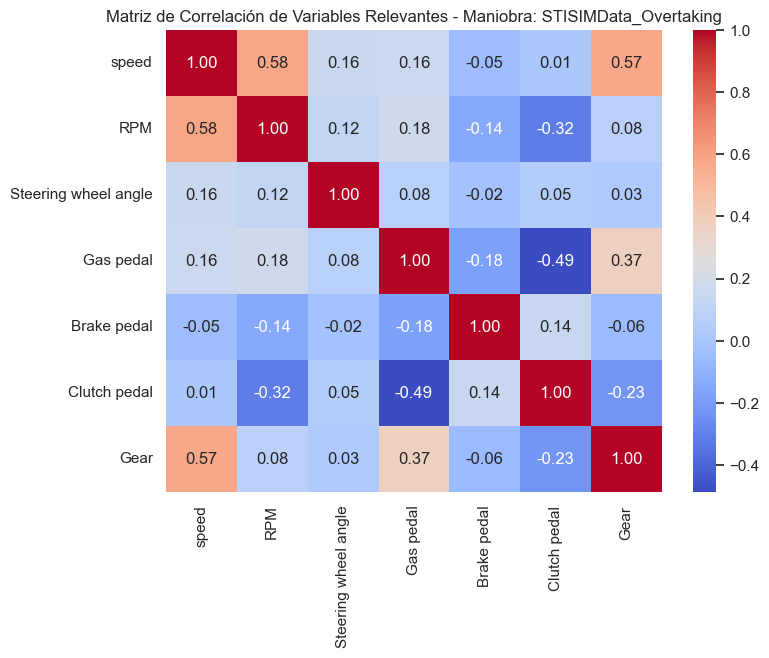

Mostrando gráficas para Driver1 - Maniobra: STISIMData_Stopping


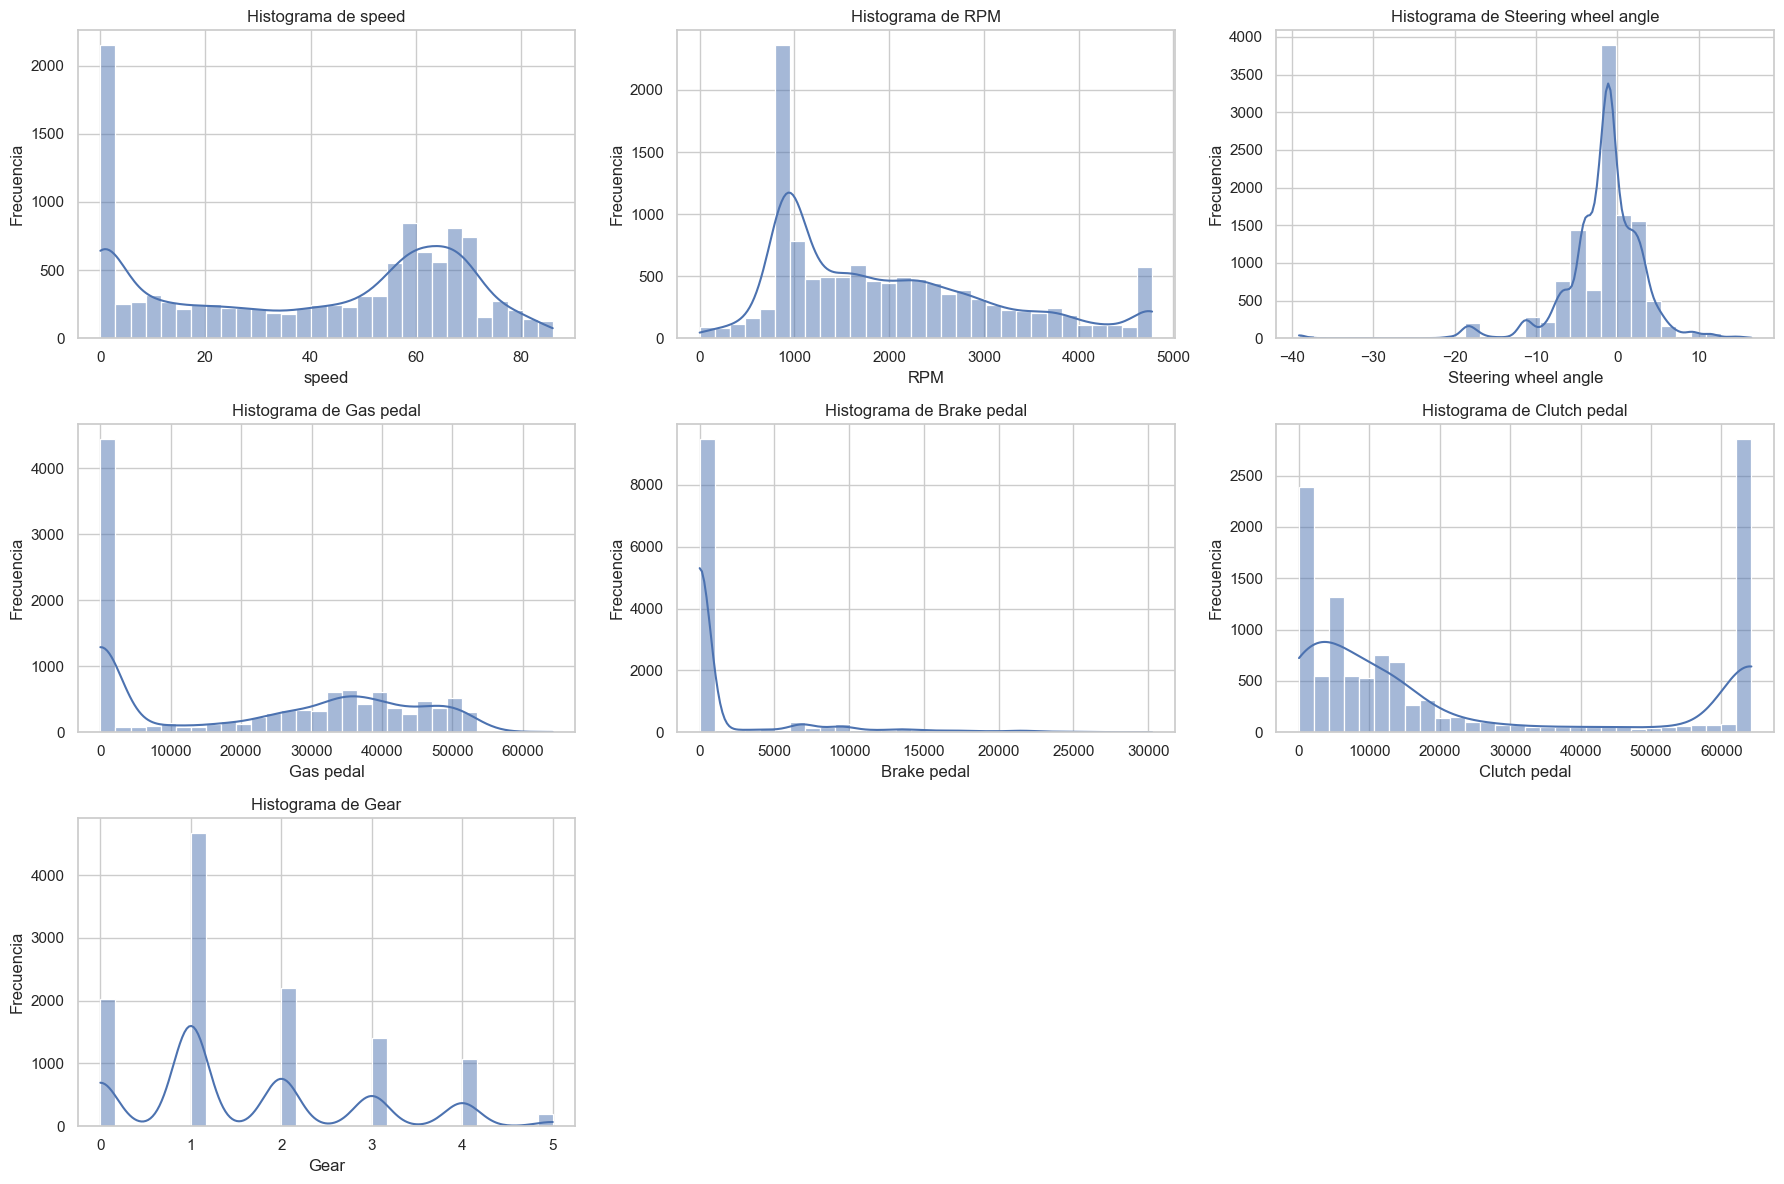

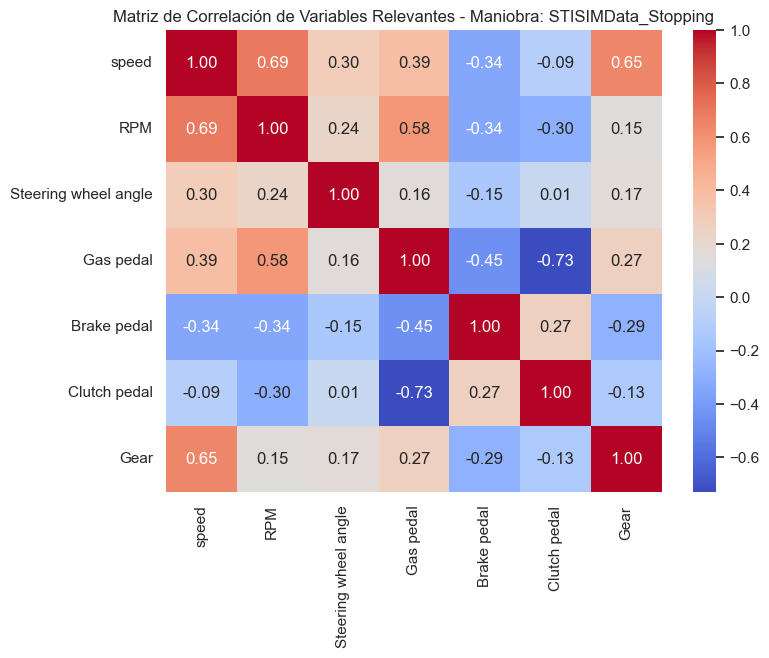

Mostrando gráficas para Driver1 - Maniobra: STISIMData_Turnings


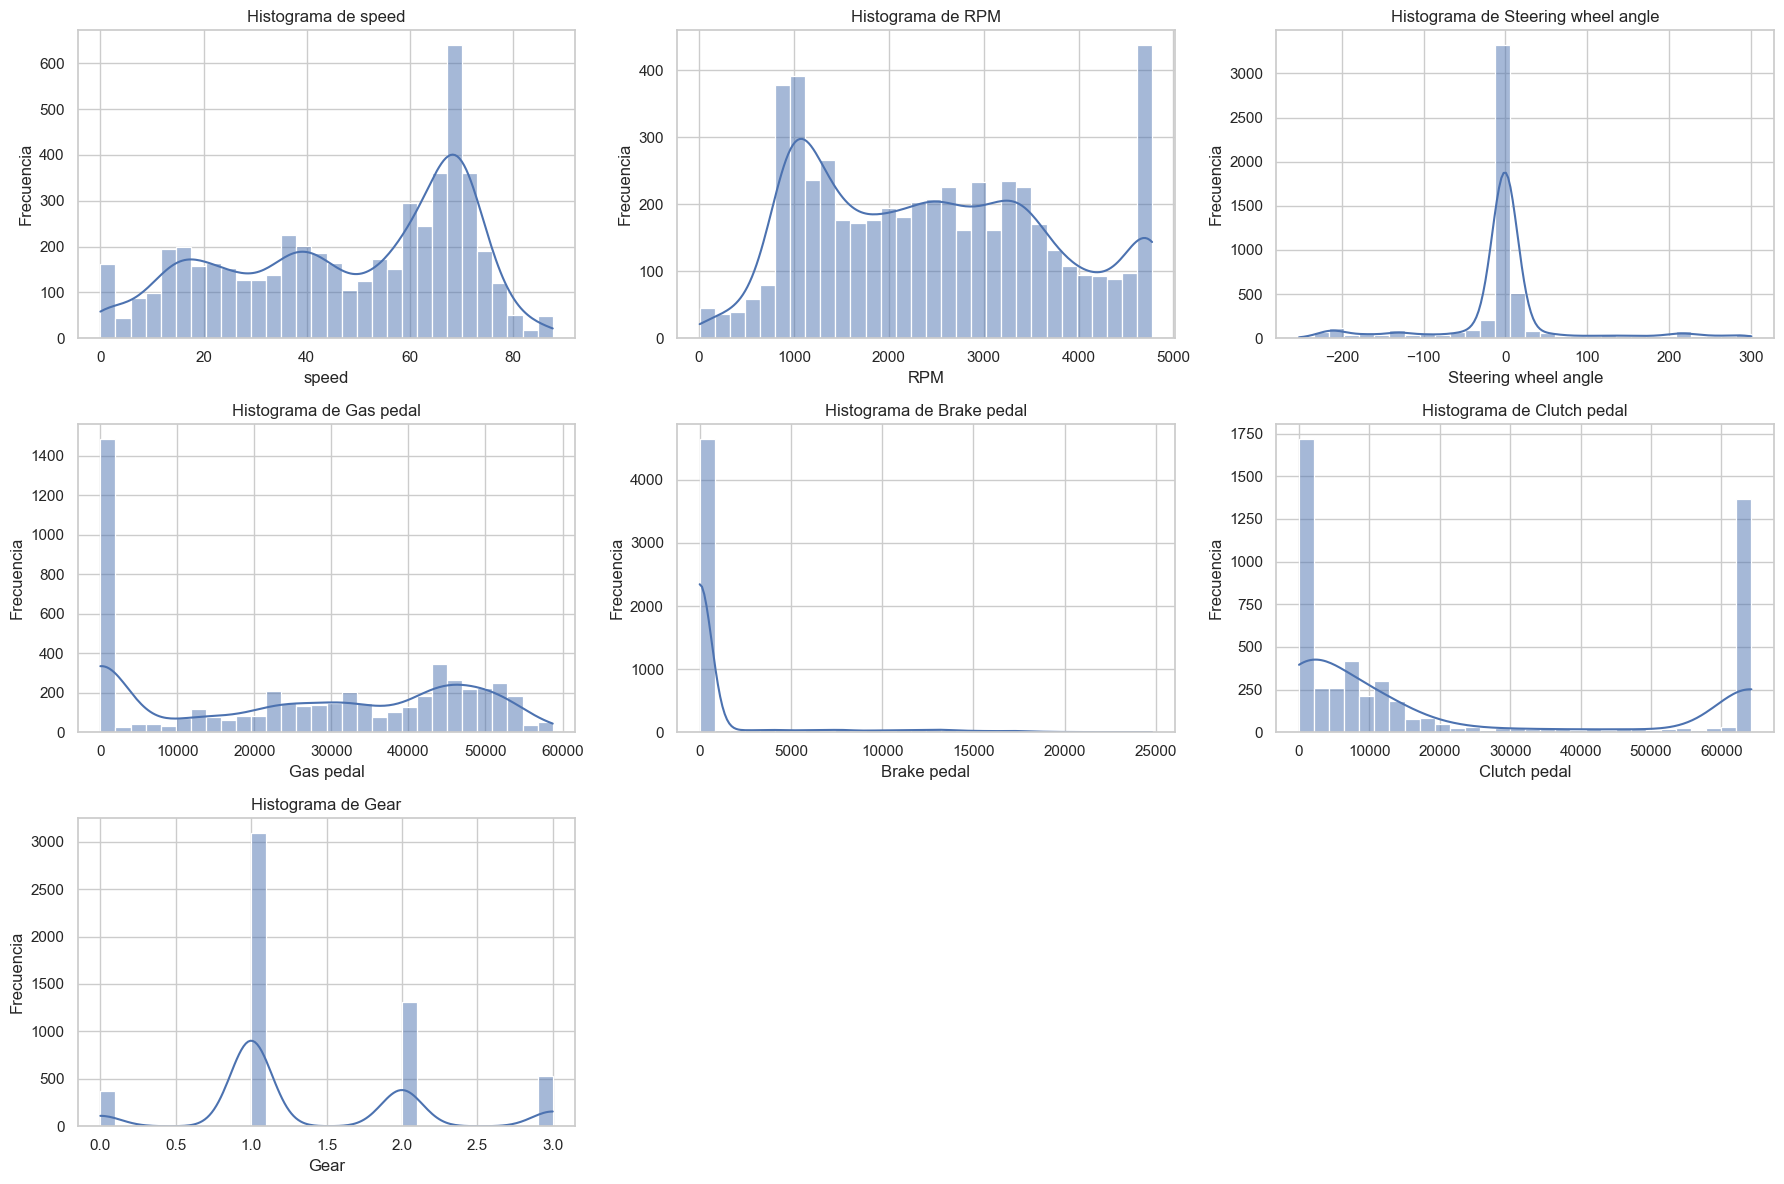

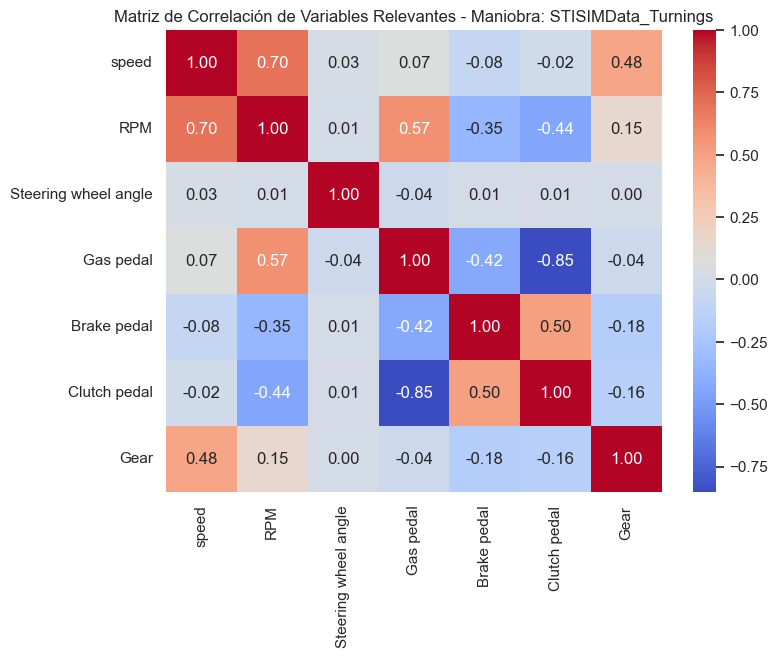

Mostrando gráficas para Driver1 - Maniobra: STISIMData_U-Turnings


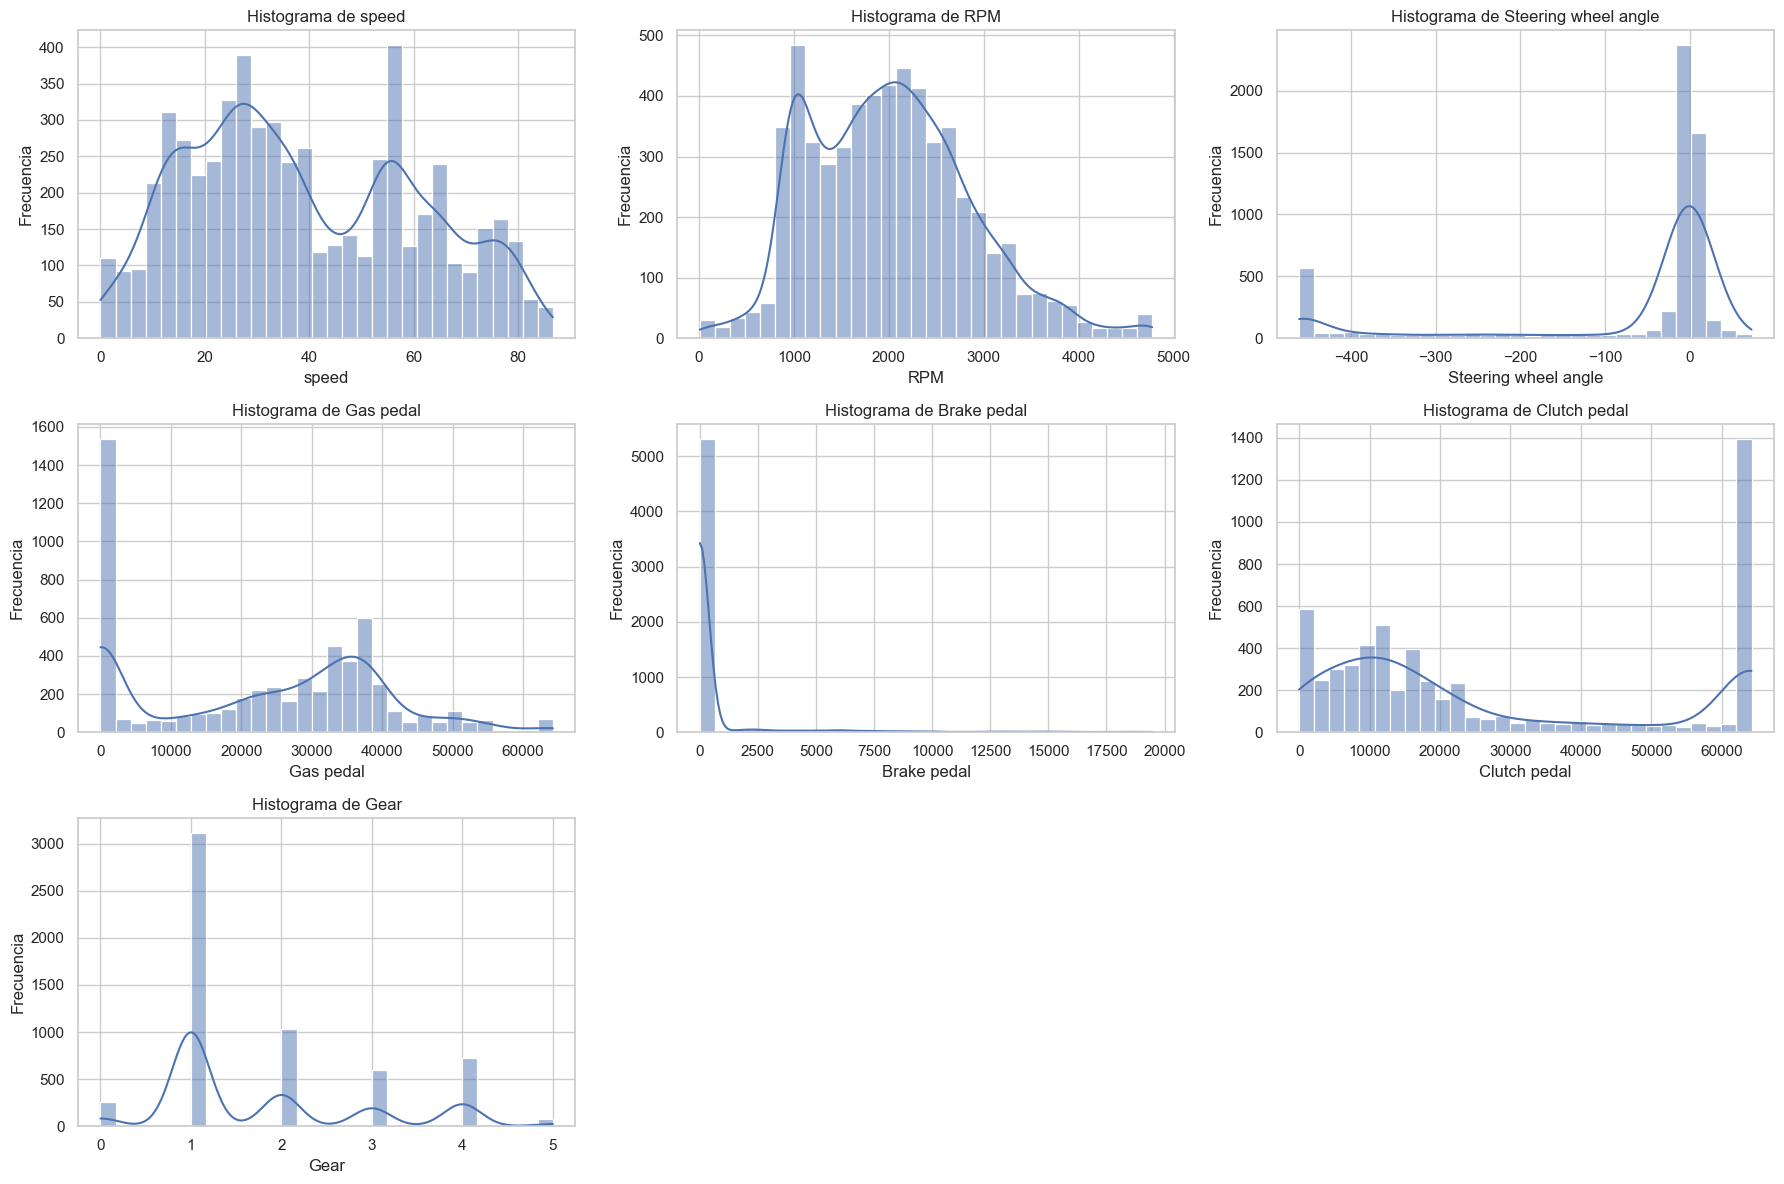

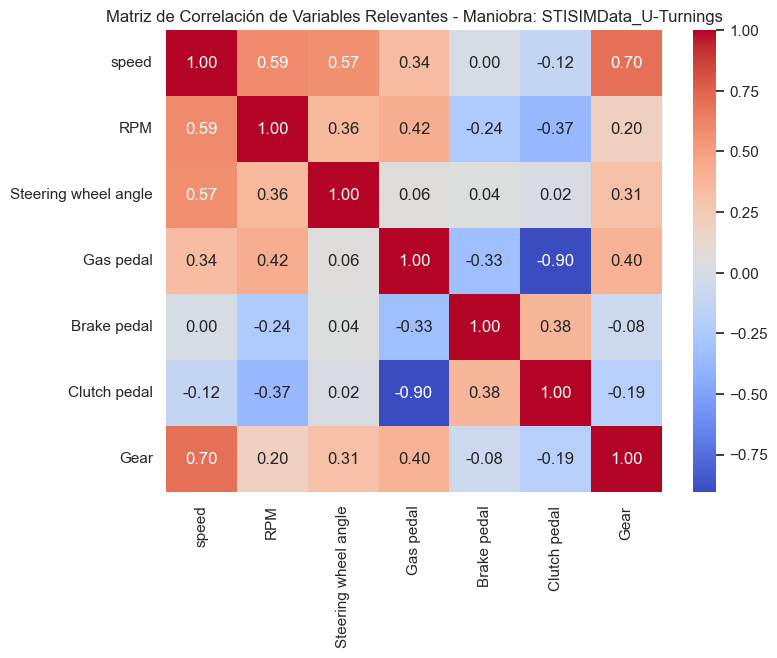

In [6]:
# Definimos las variables relevantes para el análisis
variables = [
    "speed",
    "RPM",
    "Steering wheel angle",
    "Gas pedal",
    "Brake pedal",
    "Clutch pedal",
    "Gear",
]

# Iteramos sobre todos los DataFrames correspondientes al Driver1
driver = "Driver1"
found = False
for key, df in df_dict_filtered.items():
    if key[0] == driver:
        found = True
        maneuver = key[1]
        print(f"Mostrando gráficas para Driver1 - Maniobra: {maneuver}")

        # 1. Histogramas de las variables relevantes
        plt.figure(figsize=(18, 12))
        for i, var in enumerate(variables):
            plt.subplot(3, 3, i + 1)
            sns.histplot(df[var], bins=30, kde=True)
            plt.title(f"Histograma de {var}")
            plt.xlabel(var)
            plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

        # 2. Matriz de correlación
        corr_matrix = df[variables].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(
            f"Matriz de Correlación de Variables Relevantes - Maniobra: {maneuver}"
        )
        plt.show()

if not found:
    print("No se encontraron datos para Driver1.")

1. **Histogramas:**
    - Se generan histogramas (con KDE) para cada variable para visualizar la distribución de los datos (por ejemplo, si presentan sesgo o simetría).

2. **Matriz de correlación:**
    - Se calcula la matriz de correlación y se muestra en forma de heatmap para identificar relaciones lineales entre las variables.

Tras las muestras de ejemplo de los ficheros del [`Driver1`](./data/Driver1), se pueden sacar las siguientes conclusiones del conjunto de atributos seleccionados:

1. **Correlaciones Fuertes**: La matriz de correlación revela relaciones significativas entre las variables. La velocidad y las RPM presentan una correlación positiva fuerte, lo que indica que tienden a aumentar juntas, al igual que con la marcha del vehículo. Por otro lado, el pedal de gas y el pedal de embrague muestran una correlación negativa intensa, sugiriendo que rara vez se utilizan simultáneamente. Estas correlaciones pueden ser clave para identificar características relevantes en un modelo de clasificación.

2. **Distribuciones**: Los histogramas proporcionan información sobre la distribución de los datos. La velocidad y las RPM muestran patrones específicos, con la velocidad concentrada en valores más bajos y las RPM posiblemente bimodales, lo que podría requerir normalización o transformación para mejorar el rendimiento del modelo. El pedal de freno, por su parte, tiene una alta frecuencia en valores bajos, indicando un uso menos frecuente o más suave, lo que podría ser útil para identificar patrones de conducción.

3. **Claves para Clasificación**: Los datos sugieren que ciertas relaciones y distribuciones pueden ser cruciales para distinguir entre clases en un problema de clasificación. Las correlaciones fuertes, como la entre el pedal de gas y el embrague, pueden servir como indicadores importantes para diferenciar estados o comportamientos. Además, las distribuciones observadas en los histogramas resaltan la necesidad de preprocesar los datos para asegurar que el modelo pueda capturar adecuadamente las variaciones y patrones presentes en el conjunto de datos.

# 7. Conclusiones Parciales

En este notebook hemos realizado una serie de pasos fundamentales para preparar los datos de conducción antes de avanzar a la etapa de segmentación y modelado. A continuación, se resumen los puntos clave:

- **Carga de Datos:**  
  
  Se han leído los ficheros Excel correspondientes a cada maniobra y conductor, organizándolos en un diccionario donde cada clave es una tupla (Driver, Maneuver). Esto permite trabajar de forma individual y específica con los datos de cada combinación.

- **Selección de Atributos Relevantes:**  
  
  Se han filtrado los DataFrames para conservar únicamente las variables esenciales para la detección de maniobras:  
  
  - *speed*, *RPM*, *Steering wheel angle*, *Gas pedal*, *Brake pedal*, *Clutch pedal*, *Gear* y *Maneuver marker flag*, además de los atributos identificadoras (*Driver* y *Maneuver*).  
  
  De esta manera, se descartan los atributos que no aportan información relevante para nuestro análisis.

- **Limpieza de Datos:**  
  
  Se ha verificado que no hubiera valores nulos en las variables numéricas, rellenándolos con la mediana; y que los atributos numéricos estén en el formato correcto (*float*). Además, se ha prestado especial atención a la columna *Maneuver marker flag* para garantizar que contiene únicamente los valores 0 y 1, ya que es fundamental para segmentar correctamente las maniobras.  
  
  Debido a que los datos provienen de un simulador de conducción (registrados a $20 \, \text{Hz}$) y se pretende analizar la dinámica completa mediante ventanas temporales, se decidió **no eliminar outliers** de forma sistemática para preservar la información de las transiciones, como en los cambios de marcha.

- **Discretización:**  
  
  Se han aplicado transformaciones para capturar la tendencia de cada variable a lo largo del tiempo:
  
  - Para *speed*, *RPM* y *Steering wheel angle*, se calculan las diferencias entre muestras consecutivas y se asigna +1, 0 o -1 según si la señal aumenta, se mantiene o disminuye.
  
  - Se ha seguido un criterio similar para *Gas pedal* y *Brake pedal*.
  
  - La variable *Clutch pedal* se mantiene sin cambios, al ser binaria.
  
  - Para *Gear*, se ha implementado una función personalizada que ignora los 0 intermedios (indicativos del punto muerto durante el cambio de marcha) y determina correctamente la tendencia de incremento o decremento.
  
Estas transformaciones en forma de “tendencias” serán la base para la segmentación temporal en el siguiente notebook.

En el **Notebook 2: Segmentación y Modelado**, se utilizarán estos datos ya preprocesados y transformados para aplicar la segmentación temporal (definiendo ventanas con overlapping o sin overlapping) y para entrenar los modelos de detección de maniobras.

En resumen, este notebook ha dejado el dataset en un estado limpio, organizado y enriquecido con nuevas variables de tendencia, lo cual es esencial para capturar la dinámica de las maniobras de conducción. Estos pasos sientan las bases para el análisis temporal y el modelado que se desarrollarán en el siguiente notebook.